# Top2Vec Tutorial

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec
np.random.seed(0)

## Read the Data

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [3]:
newsgroups.data

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

In [4]:
len(newsgroups.data)

18846

## Training a Top2Vec Model

In [5]:
from top2vec import Top2Vec

model = Top2Vec(newsgroups.data, workers=4, embedding_model='universal-sentence-encoder')

2021-11-15 14:13:05,705 - top2vec - INFO - Pre-processing documents for training
2021-11-15 14:13:16,941 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:Using /var/folders/7b/3rvdqtr10bx8dtgw4y0b_my00000gp/T/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloading https://tfhub.dev/google/universal-sentence-encoder/4: 740.00MB
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-11-15 14:13:43,953 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-11-15 14:15:26,870 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-11-15 14:15:52,955 - top2vec - INFO - Finding dense areas of documents
INFO

## Viewing the Number of Topics

In [6]:
model.get_num_topics()

106

## Getting Keywords for Each Topic

In [7]:
model.topic_words

array([['recchi', 'potvin', 'nyr', ..., 'pittsburgh', 'binghamton',
        'pitt'],
       ['diagnosed', 'symptoms', 'diagnosis', ..., 'admitted', 'patents',
        'contains'],
       ['spacecraft', 'jpl', 'orbiter', ..., 'sphere', 'convention',
        'comet'],
       ...,
       ['camera', 'cameras', 'lens', ..., 'gmt', 'scope', 'agencies'],
       ['armenians', 'ankara', 'armenian', ..., 'balcony', 'turkish',
        'whom'],
       ['utilities', 'neighbors', 'rent', ..., 'concern', 'concerning',
        'applications']], dtype='<U15')

In [8]:
model.topic_words[0]

array(['recchi', 'potvin', 'nyr', 'lemieux', 'nyi', 'lindros', 'nhl',
       'phillies', 'defenseman', 'mets', 'ahl', 'jagr', 'bruins',
       'sabres', 'cubs', 'gretzky', 'alomar', 'pitchers', 'pitching',
       'clemens', 'canucks', 'henrik', 'inning', 'innings', 'oilers',
       'yankees', 'boswell', 'islanders', 'utica', 'braves', 'hockey',
       'rangers', 'leafs', 'wpg', 'flyers', 'baseball', 'sox', 'playoffs',
       'dodgers', 'fuhr', 'goalie', 'espn', 'ulf', 'playoff', 'hawks',
       'batting', 'tampa', 'pittsburgh', 'binghamton', 'pitt'],
      dtype='<U15')

## Creating Topic Wordclouds

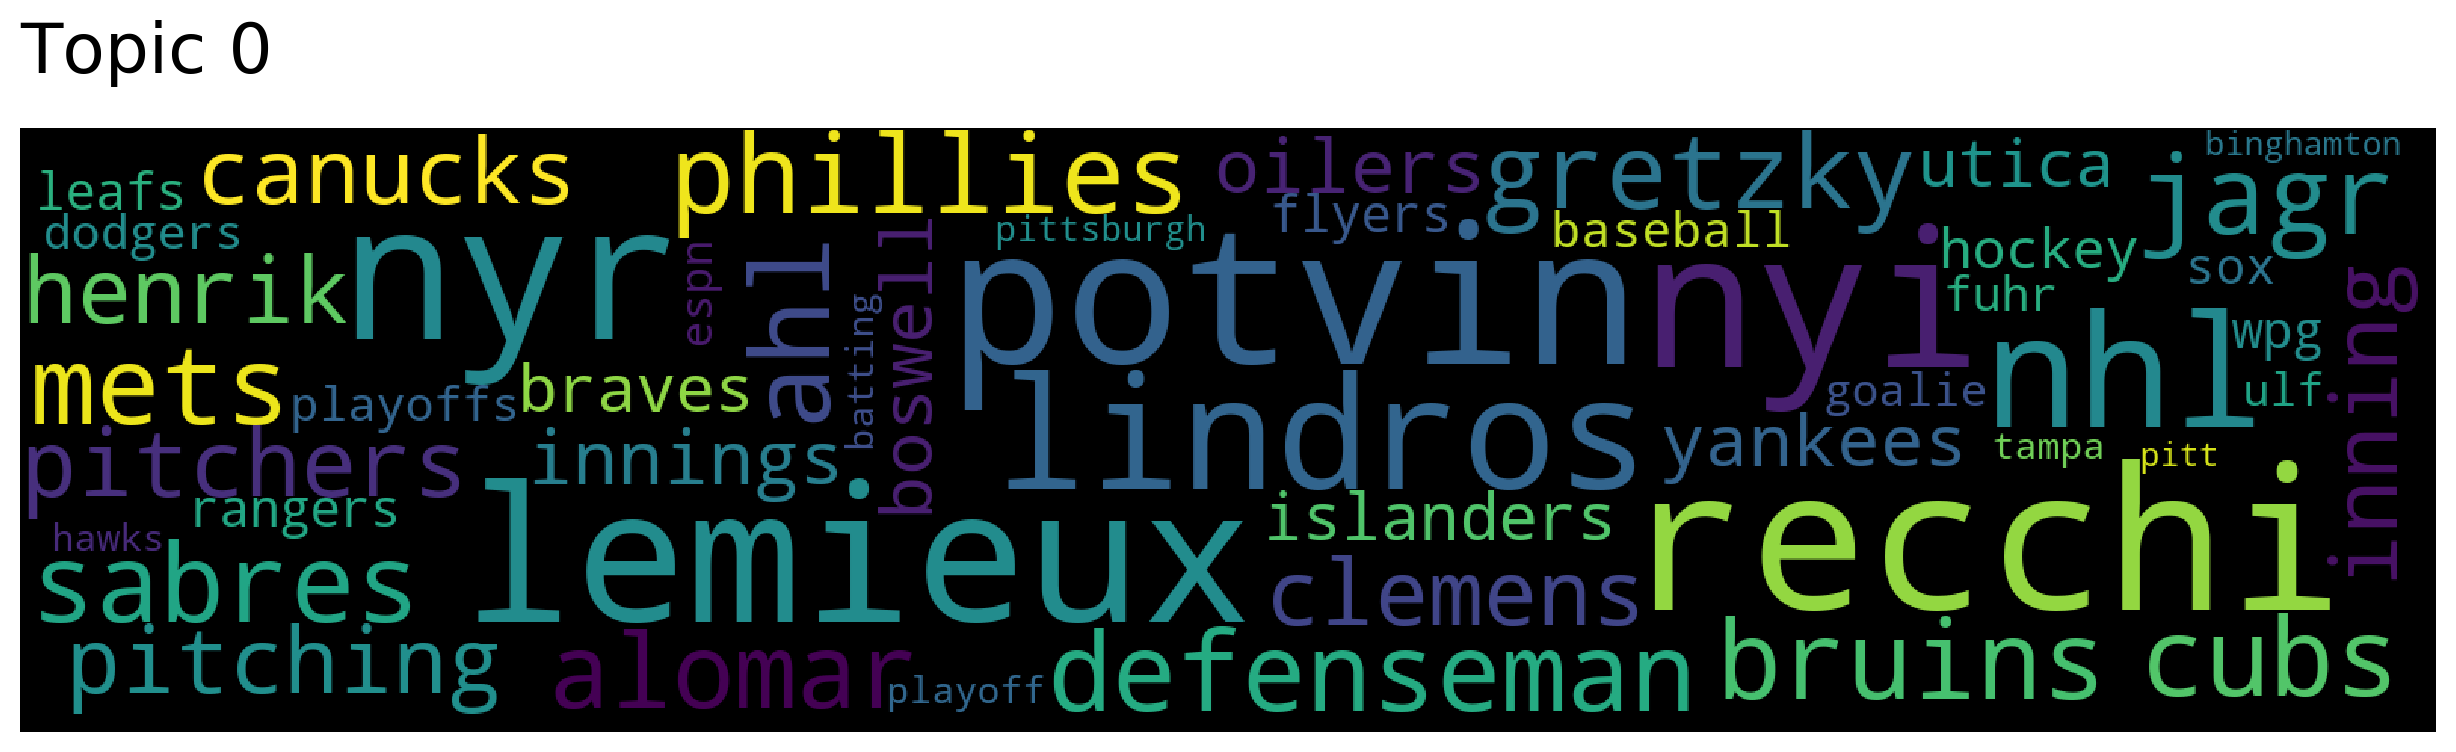

In [9]:
model.generate_topic_wordcloud(0)

## Accessing Topic Vectors

In [10]:
model.topic_vectors

array([[-0.00787245, -0.08659051, -0.05415307, ...,  0.02021601,
        -0.12080775, -0.00054799],
       [-0.04082942, -0.02667546,  0.02298673, ...,  0.07308532,
        -0.06188694, -0.0531583 ],
       [-0.0317127 , -0.04807976, -0.02781419, ...,  0.04814521,
        -0.04721902, -0.03469552],
       ...,
       [-0.04947267, -0.05706654, -0.03569593, ...,  0.02262455,
        -0.00081372, -0.06911805],
       [-0.04707387,  0.0515697 ,  0.00859228, ...,  0.04690101,
        -0.021385  , -0.04964946],
       [-0.02164169, -0.0356777 , -0.01237642, ...,  0.03075485,
         0.05937018,  0.04607615]], dtype=float32)

## Searching for Topics by Keyword

In [11]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], num_topics=3)

In [12]:
topic_words, topic_scores

([array(['clinton', 'bush', 'president', 'reagan', 'democratic',
         'republicans', 'wiretap', 'congress', 'elected', 'johnson',
         'administration', 'politicians', 'politically', 'election',
         'executive', 'politics', 'bill', 'senate', 'lib', 'political',
         'democracy', 'ford', 'iraq', 'rockefeller', 'libertarian',
         'corrupt', 'libertarians', 'barry', 'government', 'constitutional',
         'nuy', 'gov', 'convention', 'weren', 'koresh', 'jefferson', 'nist',
         'grant', 'feds', 'liar', 'nsa', 'ws', 'affairs', 'conservative',
         'recall', 'fool', 'bullshit', 'liberal', 'govt', 'stephanopoulos'],
        dtype='<U15'),
  array(['um', 'ci', 'oo', 'll', 'ye', 'hmm', 'un', 'uh', 'y_', 'wt', 'on',
         'an', 'uu', 'actually', 'eh', 'way', 'des', 'er', 'se', 'not',
         'has', 'huh', 'of', 'ya', 'so', 'it', 'in', 'le', 'upon', 'one',
         'hm', 'is', 'es', 'at', 'ne', 'what', 'au', 'no', 'shut', 'mm',
         'est', 'dont', 'got', 'tu

## Searching for Documents by Topic

In [13]:
model.search_documents_by_topic(0, num_docs=1)

(array(['\nI think this guy is going to be just a little bit disappointed.  Lemieux\ntwo, Tocchet, Mullen, Tippett, and Jagr.  I buzzed my friend because I forgot\nwho had scored Mullen\'s goal.  I said, "Who scored?  Lemieux two, Tocchet,\nTippett, Jagr."  The funny part was I said the "Jagr" part non-chalantly as\nhe was in the process of scoring while I was asking this question!!! :-)\n\nAll in all ABC\'s coverage wasn\'t bad.  On a scale of 1-10, I give it about\nan 8.  How were the games in the Chi/St. Louis/LA area???\n\n\nThat\'s stupid!!!  I\'d complain to the television network!  If I were to even\nsee a Pirates game on instead of a Penguins game at this time of the year, I\nand many other Pittsburghers would surely raise hell!!!\n\n\nTexas is off to a good start, they may pull it out this year.  Whoops!  That\nbelongs in rec.sport.baseball!!!'],
       dtype=object),
 array([0.75277877], dtype=float32),
 array([12405]))

## Using the Model's Embedding Function

In [14]:
embedding_vector = model.embed(["This is a fake news article."])
embedding_vector.shape

TensorShape([1, 512])

## Reducing the Number of Topics

In [15]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [16]:
topic_mapping[1]

[37, 47, 51, 21, 43, 32, 18, 23, 79, 56, 14]

In [17]:
model.topic_words_reduced[1]

array(['irq', 'mhz', 'motherboard', 'processor', 'sgi', 'ati', 'scsi',
       'cmos', 'processors', 'dma', 'risc', 'vga', 'cpu', 'baud',
       'packard', 'maxtor', 'powerbook', 'vms', 'ansi', 'hardware',
       'ieee', 'modems', 'vesa', 'intel', 'deskjet', 'xt', 'oscillator',
       'bsd', 'ibm', 'monitor', 'vram', 'bios', 'printers', 'workstation',
       'printer', 'specs', 'computer', 'svga', 'floppies', 'hp', 'ram',
       'rgb', 'mov', 'bandwidth', 'monitors', 'workstations', 'khz',
       'compatible', 'gfx', 'computing'], dtype='<U15')